<a href="https://colab.research.google.com/github/huongtran2104/Final-Project/blob/main/%5BFinal%5D_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TOPIC: The influence of marketing spend to sales 💸**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [ ]:
customer_df=pd.read_excel("/content/CustomersData.xlsx")

In [ ]:
discount_df=pd.read_csv("/content/Discount_Coupon.csv")

In [ ]:
sales_df=pd.read_csv("/content/Online_Sales.csv")

In [ ]:
mkt_spend_df=pd.read_csv("/content/Marketing_Spend.csv")

# **Data Profiling**

## **Descriptive Statistics**

### Customer data

In [ ]:
customer_df.sample(5)

,CustomerID,Gender,Location,Tenure_Months
81,14496,F,California,47
20,13408,M,Chicago,30
1243,16660,F,New Jersey,3
526,15713,M,California,3
883,12417,F,California,37


In [ ]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB


### Discount data

In [ ]:
discount_df.sample(5)

,Month,Product_Category,Coupon_Code,Discount_pct
45,Jan,Notebooks & Journals,NJ10,10
49,Feb,Android,AND20,20
19,Feb,Notebooks,NOTES20,20
99,Apr,Android,AND10,10
105,Jul,Nest-USA,ELEC10,10


In [ ]:
discount_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    object
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


### Online sales data

In [ ]:
sales_df.sample(5)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
33435,17365,35973,8/18/2019,GGOEGAAL010614,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,1,13.59,6.00,Used
32219,12766,35403,8/11/2019,GGOEGHGH019699,Google Sunglasses,Lifestyle,1,2.80,6.00,Clicked
38085,12356,38209,9/15/2019,GGOEGDWR015799,Red Shine 15 oz Mug,Drinkware,1,10.39,6.50,Clicked
33954,13162,36230,8/22/2019,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,2,79.00,6.00,Clicked
14165,12872,25873,4/18/2019,GGOEGOCC077999,Google Spiral Journal with Pen,Notebooks & Journals,85,7.99,170.78,Used


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  object 
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.0+ MB


### Marketing Spend data

In [ ]:
mkt_spend_df.sample(5)

,Date,Offline_Spend,Online_Spend
301,10/29/2019,2000,1564.09
45,2/15/2019,3000,1738.89
175,6/25/2019,1500,956.13
39,2/9/2019,3000,2659.34
88,3/30/2019,2000,692.02


In [ ]:
mkt_spend_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


## **Fixing Datatypes**

### Customer data

In [ ]:
customer_df["Location"]=customer_df["Location"].astype("string")

In [ ]:
customer_df["Gender"]=customer_df["Gender"].astype("category")

Check the datatype again

In [ ]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   CustomerID     1468 non-null   int64   
 1   Gender         1468 non-null   category
 2   Location       1468 non-null   string  
 3   Tenure_Months  1468 non-null   int64   
dtypes: category(1), int64(2), string(1)
memory usage: 36.1 KB


### Discount data

In [ ]:
discount_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    object
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [ ]:
str_columns=["Product_Category","Coupon_Code"]
discount_df[str_columns]=discount_df[str_columns].astype("string")

### Online sales data

In [ ]:
str_columns=["Product_SKU","Product_Category","Product_Description","Coupon_Status"]
sales_df[str_columns]=sales_df[str_columns].astype("string")

In [ ]:
sales_df['Transaction_Date'] = pd.to_datetime(sales_df['Transaction_Date'], format="%m/%d/%Y", errors='coerce')
sales_df.sample(5)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
6504,16718,21015,2019-02-21,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,1,119.00,6.50,Clicked
1979,17850,18017,2019-01-16,GGOEGAEC033115,Google Men's Long Sleeve Raglan Ocean Blue,Apparel,1,20.62,6.50,Clicked
17006,16779,27489,2019-05-08,GGOEGKAA019299,Switch Tone Color Crayon Pen,Office,1,1.99,12.99,Not Used
16524,16923,27237,2019-05-04,GGOEGAER035514,Google Men's Vintage Tank,Apparel,1,14.69,6.00,Used
12925,12433,25228,2019-04-10,GGOEAAAJ080817,Android Men's Engineer Short Sleeve Tee Charcoal,Apparel,1,19.99,6.50,Clicked


Check the data again

In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  string        
 4   Product_Description  52924 non-null  string        
 5   Product_Category     52924 non-null  string        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(3), string(4)
memory usage: 4.0 MB


### Marketing Spend

In [ ]:
mkt_spend_df['Date'] = pd.to_datetime(mkt_spend_df['Date'], errors='coerce')

In [ ]:
mkt_spend_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           365 non-null    datetime64[ns]
 1   Offline_Spend  365 non-null    int64         
 2   Online_Spend   365 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 8.7 KB


## **Check consistency**

### Customer Data

In [ ]:
customer_df["Gender"].unique()

['M', 'F']
Categories (2, object): ['F', 'M']

In [ ]:
customer_df["Location"].unique()

<StringArray>
['Chicago', 'California', 'New York', 'New Jersey', 'Washington DC']
Length: 5, dtype: string

### Discount data

In [ ]:
discount_df["Month"].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [ ]:
discount_df["Product_Category"].unique()

<StringArray>
[             'Apparel',             'Nest-USA',               'Office',
            'Drinkware',            'Lifestyle',                 'Bags',
            'Notebooks',             'Headgear',                 'Nest',
                 'Waze',              'Bottles',          'Nest-Canada',
           'Housewares',          'Accessories',           'Gift Cards',
 'Notebooks & Journals',              'Android']
Length: 17, dtype: string

### Online sales data

In [ ]:
sales_df["Product_Category"].unique()

<StringArray>
[            'Nest-USA',               'Office',              'Apparel',
                 'Bags',            'Drinkware',            'Lifestyle',
 'Notebooks & Journals',             'Headgear',                 'Waze',
                  'Fun',          'Nest-Canada',            'Backpacks',
               'Google',              'Bottles',           'Gift Cards',
            'More Bags',           'Housewares',              'Android',
          'Accessories',                 'Nest']
Length: 20, dtype: string

In [ ]:
sales_df["Coupon_Status"].unique()

<StringArray>
['Used', 'Not Used', 'Clicked']
Length: 3, dtype: string

## **Detecting outliers**

In [ ]:
customer_df.describe()

,CustomerID,Tenure_Months
count,1468.000000,1468.000000
mean,15314.386240,25.912125
std,1744.000367,13.959667
min,12346.000000,2.000000
25%,13830.500000,14.000000
50%,15300.000000,26.000000
75%,16882.250000,38.000000
max,18283.000000,50.000000


In [ ]:
discount_df.describe()

,Discount_pct
count,204.000000
mean,20.000000
std,8.185052
min,10.000000
25%,10.000000
50%,20.000000
75%,30.000000
max,30.000000


In [ ]:
sales_df.describe()

,CustomerID,Transaction_ID,Transaction_Date,Quantity,Avg_Price,Delivery_Charges
count,52924.00000,52924.000000,52924,52924.000000,52924.000000,52924.000000
mean,15346.70981,32409.825675,2019-07-05 19:16:09.450532864,4.497638,52.237646,10.517630
min,12346.00000,16679.000000,2019-01-01 00:00:00,1.000000,0.390000,0.000000
25%,13869.00000,25384.000000,2019-04-12 00:00:00,1.000000,5.700000,6.000000
50%,15311.00000,32625.500000,2019-07-13 00:00:00,1.000000,16.990000,6.000000
75%,16996.25000,39126.250000,2019-09-27 00:00:00,2.000000,102.130000,6.500000
max,18283.00000,48497.000000,2019-12-31 00:00:00,900.000000,355.740000,521.360000
std,1766.55602,8648.668977,NaN,20.104711,64.006882,19.475613


In [ ]:
# Quartiles calcualtion
Q1 = sales_df['Quantity'].quantile(0.25)
Q3 = sales_df['Quantity'].quantile(0.75)

# IQR calculation
IQR = Q3 - Q1

# Lower and Upper bounds for non-outliers calculating
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
lower_bound

np.float64(-0.5)

In [ ]:
upper_bound

np.float64(3.5)

Let's check the product category that

In [ ]:
sales_df[sales_df["Quantity"]>3.5]

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.50,Not Used
5,17850,16682,2019-01-01,GGOEGBMJ013399,Sport Bag,Bags,15,5.15,6.50,Used
6,17850,16682,2019-01-01,GGOEGDHC018299,Google 22 oz Water Bottle,Drinkware,15,3.08,6.50,Not Used
7,17850,16682,2019-01-01,GGOEGDHG014499,Google Infuser-Top Water Bottle,Drinkware,15,10.31,6.50,Clicked
8,17850,16682,2019-01-01,GGOEGDWC020199,Engraved Ceramic Google Mug,Drinkware,5,9.27,6.50,Used
...,...,...,...,...,...,...,...,...,...,...
52906,12956,48482,2019-12-31,GGOEGAEJ028116,Google Women's Short Sleeve Badge Tee Grey,Apparel,4,3.47,6.50,Clicked
52907,12956,48482,2019-12-31,GGOEGAEQ027917,Google Women's Short Sleeve Hero Tee White,Apparel,4,3.47,6.50,Used
52910,15781,48488,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked
52922,14600,48496,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked


In [ ]:
sales_df[sales_df["Quantity"]>upper_bound]["Product_Category"].unique()

<StringArray>
[             'Apparel',                 'Bags',            'Drinkware',
               'Office', 'Notebooks & Journals',             'Headgear',
                  'Fun',            'Lifestyle',             'Nest-USA',
              'Bottles',            'More Bags',           'Housewares',
          'Nest-Canada',               'Google',                 'Waze',
            'Backpacks',           'Gift Cards',          'Accessories',
                 'Nest']
Length: 19, dtype: string

In [ ]:
Q=sales_df["Quantity"].quantile(0.99)

In [ ]:
sales_df[sales_df["Quantity"]>Q]["Transaction_ID"].count()

np.int64(484)

In [ ]:
cond1=sales_df["Quantity"]<=Q

#### Detecting outliers - Avg_Price

In [ ]:
# Quartiles calcualtion
Q1 = sales_df['Avg_Price'].quantile(0.25)
Q3 = sales_df['Avg_Price'].quantile(0.75)

# IQR calculation
IQR = Q3 - Q1

# Lower and Upper bounds for non-outliers calculating
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
lower_bound

np.float64(-138.945)

In [ ]:
upper_bound

np.float64(246.77499999999998)

In [ ]:
sales_df[sales_df["Avg_Price"]>upper_bound]

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
61,17850,16704,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,256.88,6.5,Used
3099,14449,18803,2019-01-25,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,256.88,6.5,Clicked
3261,15061,18898,2019-01-26,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,256.88,6.5,Clicked
3262,15061,18899,2019-01-26,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,256.88,6.5,Used
3692,13402,19137,2019-01-30,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,256.88,6.5,Clicked
...,...,...,...,...,...,...,...,...,...,...
52828,17105,48421,2019-12-30,GGOENEBQ092299,Nest Secure Alarm System Starter Pack - USA,Nest,1,355.74,6.5,Clicked
52832,17105,48424,2019-12-30,GGOENEBQ092299,Nest Secure Alarm System Starter Pack - USA,Nest,1,355.74,6.5,Used
52837,17105,48428,2019-12-30,GGOENEBQ092299,Nest Secure Alarm System Starter Pack - USA,Nest,1,355.74,6.5,Used
52873,14606,48456,2019-12-31,GGOENEBQ092299,Nest Secure Alarm System Starter Pack - USA,Nest,1,355.74,6.5,Used


In [ ]:
sales_df[sales_df["Avg_Price"]>upper_bound]["Product_Category"].unique()

<StringArray>
['Nest-USA', 'Gift Cards', 'Nest']
Length: 3, dtype: string

In [ ]:
Q=sales_df["Avg_Price"].quantile(0.99)
Q

np.float64(279.0)

In [ ]:
sales_df[sales_df["Avg_Price"]>Q]["Transaction_ID"].count()

np.int64(499)

In [ ]:
cond2=sales_df["Avg_Price"]<=Q

In [ ]:
sales_df_cleaned=sales_df[cond1 & cond2]

In [ ]:
sales_df_cleaned.describe()

,CustomerID,Transaction_ID,Transaction_Date,Quantity,Avg_Price,Delivery_Charges
count,51941.000000,51941.000000,51941,51941.000000,51941.000000,51941.000000
mean,15349.709536,32320.047843,2019-07-04 18:14:03.772742656,3.134980,49.807122,10.221832
min,12346.000000,16679.000000,2019-01-01 00:00:00,1.000000,0.390000,0.000000
25%,13871.000000,25336.000000,2019-04-11 00:00:00,1.000000,5.700000,6.000000
50%,15311.000000,32531.000000,2019-07-13 00:00:00,1.000000,16.990000,6.000000
75%,17001.000000,38947.000000,2019-09-25 00:00:00,2.000000,100.910000,6.500000
max,18283.000000,48497.000000,2019-12-31 00:00:00,60.000000,279.000000,492.840000
std,1766.537668,8617.874868,NaN,6.642761,57.340636,17.796828


In [ ]:
sales_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51941 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           51941 non-null  int64         
 1   Transaction_ID       51941 non-null  int64         
 2   Transaction_Date     51941 non-null  datetime64[ns]
 3   Product_SKU          51941 non-null  string        
 4   Product_Description  51941 non-null  string        
 5   Product_Category     51941 non-null  string        
 6   Quantity             51941 non-null  int64         
 7   Avg_Price            51941 non-null  float64       
 8   Delivery_Charges     51941 non-null  float64       
 9   Coupon_Status        51941 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(3), string(4)
memory usage: 4.4 MB


📌 **Key takeaway:**
- The dataset is influenced by large number of outliers came from 2 main factors: high value products and bulk purchase.
- However, the abondant of these outliers can lead to inaccuracy of the business performance.

## **Merge DataFrame**

In [ ]:
merged_df = pd.merge(sales_df_cleaned, customer_df, on='CustomerID', how='left')

# Extract the month from the 'Transaction_Date' in the merged_df
merged_df['Month'] = merged_df['Transaction_Date'].dt.strftime('%b') # Extracting abbreviated month name

# Merge the dataframe with discount_df on 'Product_Category' and 'Month'
final_df = pd.merge(merged_df, discount_df, on=['Product_Category', 'Month'], how='left')

final_df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Gender,Location,Tenure_Months,Month,Coupon_Code,Discount_pct
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,Jan,ELEC10,10.0
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,Jan,ELEC10,10.0
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,M,Chicago,12,Jan,OFF10,10.0
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,M,Chicago,12,Jan,SALE10,10.0
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,M,Chicago,12,Jan,AIO10,10.0


### Check duplicates

In [ ]:
final_df.duplicated().sum()

np.int64(0)

### Check missing values

In [ ]:
final_df.isnull().sum()

,0
CustomerID,0
Transaction_ID,0
Transaction_Date,0
Product_SKU,0
Product_Description,0
Product_Category,0
Quantity,0
Avg_Price,0
Delivery_Charges,0
Coupon_Status,0


In [ ]:
final_df[final_df["Coupon_Code"].isnull()]

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Gender,Location,Tenure_Months,Month,Coupon_Code,Discount_pct
62,17850,16704,2019-01-01,GGOEYOBR078599,YouTube Luggage Tag,Fun,4,9.27,6.50,Used,M,Chicago,12,Jan,<NA>,NaN
95,14688,16742,2019-01-02,GGOEGBRD079699,25L Classic Rucksack,Backpacks,1,103.15,6.50,Clicked,F,New York,46,Jan,<NA>,NaN
157,18074,16782,2019-01-02,GGOEGOBC078699,Google Luggage Tag,Fun,1,7.42,6.50,Used,F,California,10,Jan,<NA>,NaN
178,16029,16800,2019-01-02,GGOEAOBH078799,Android Luggage Tag,Fun,2,7.42,6.50,Not Used,F,Washington DC,40,Jan,<NA>,NaN
193,16250,16812,2019-01-02,GGOEGDHG082499,Google 25 oz Clear Stainless Steel Bottle,Google,1,11.54,17.96,Clicked,F,California,30,Jan,<NA>,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43632,12472,42109,2019-10-30,GGOEGBRD079699,25L Classic Rucksack,Backpacks,1,79.99,6.00,Clicked,F,New Jersey,2,Oct,<NA>,NaN
44536,14911,42756,2019-11-07,GGOEGBRD079699,25L Classic Rucksack,Backpacks,1,79.99,6.00,Not Used,F,California,34,Nov,<NA>,NaN
45144,18125,43244,2019-11-12,GGOEGBRD079699,25L Classic Rucksack,Backpacks,1,99.99,6.00,Clicked,F,Chicago,3,Nov,<NA>,NaN
45561,17180,43537,2019-11-15,GGOEGBRD079699,25L Classic Rucksack,Backpacks,1,79.99,6.00,Used,F,Chicago,35,Nov,<NA>,NaN


Why there is null?

In [ ]:
discount_df["Product_Category"].unique()

<StringArray>
[             'Apparel',             'Nest-USA',               'Office',
            'Drinkware',            'Lifestyle',                 'Bags',
            'Notebooks',             'Headgear',                 'Nest',
                 'Waze',              'Bottles',          'Nest-Canada',
           'Housewares',          'Accessories',           'Gift Cards',
 'Notebooks & Journals',              'Android']
Length: 17, dtype: string

In [ ]:
sales_df["Product_Category"].unique()

<StringArray>
[            'Nest-USA',               'Office',              'Apparel',
                 'Bags',            'Drinkware',            'Lifestyle',
 'Notebooks & Journals',             'Headgear',                 'Waze',
                  'Fun',          'Nest-Canada',            'Backpacks',
               'Google',              'Bottles',           'Gift Cards',
            'More Bags',           'Housewares',              'Android',
          'Accessories',                 'Nest']
Length: 20, dtype: string

**Key takeaway:**
- There are 4 product category did not be listed in the discount data (Fun, Google, More Bags, Backpacks).
- Meanwhile, in discount dataset have "Notebooks", but it was not listed in the sales dataset.

**SOLUTION:** drop all the null values

In [ ]:
final_df=final_df.dropna()

In [ ]:
final_df.isnull().sum()

,0
CustomerID,0
Transaction_ID,0
Transaction_Date,0
Product_SKU,0
Product_Description,0
Product_Category,0
Quantity,0
Avg_Price,0
Delivery_Charges,0
Coupon_Status,0


🧹 Now the dataset is cleaned!

### Qualify the dataset

This dataset does not provide information about the location of the e-commerce business. In addition, an e-commerce company may operate multiple warehouses in different regions. As a result, delivery charges are not a reliable metric for analyzing relationships in this case.

In [ ]:
delivery_charges_by_region = final_df[final_df["Product_Category"]=="Nest-USA"].groupby('Location')['Delivery_Charges'].mean().reset_index()
delivery_charges_by_region


,Location,Delivery_Charges
0,California,7.120234
1,Chicago,7.118653
2,New Jersey,7.065628
3,New York,7.189180
4,Washington DC,6.784146


Therefore, for the purpose of this analysis, we will exclude delivery charges and location from consideration.

In [ ]:
final_df.drop(columns="Delivery_Charges",inplace=True)

In [ ]:
final_df.drop(columns="Location",inplace=True)

Next, to simplify the calculation, I will divide the discount percentage by 100 to convert it into its decimal form for further computations.

In [ ]:
final_df["Discount_pct"]=final_df["Discount_pct"]/100
final_df.sample(10)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Coupon_Status,Gender,Tenure_Months,Month,Coupon_Code,Discount_pct
30627,15311,34782,2019-08-05,GGOEGAAQ057213,Google Men's Colorblock Tee White/Heather,Apparel,1,27.99,Clicked,F,40,Aug,SALE20,0.2
32959,12601,35927,2019-08-17,GGOEGALB034114,Google Women's Vintage Hero Tee Black,Apparel,1,4.56,Used,F,10,Aug,SALE20,0.2
27306,15808,33189,2019-07-19,GGOEWEBB082699,Waze Mobile Phone Vent Mount,Waze,1,6.99,Clicked,F,6,Jul,WEMP10,0.1
38861,17611,38872,2019-09-24,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,2,119.00,Used,M,26,Sep,ELEC30,0.3
46241,12377,44120,2019-11-21,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,149.00,Used,F,27,Nov,ELEC20,0.2
19731,14606,29099,2019-05-29,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,1,79.00,Used,F,33,May,ELEC20,0.2
11935,16713,24789,2019-04-04,GGOEWAEA083899,Waze Dress Socks,Waze,1,8.99,Clicked,M,5,Apr,WEMP10,0.1
39837,17504,39491,2019-10-01,GGOEGCBC016999,Google Pet Feeding Mat,Lifestyle,1,1.68,Not Used,F,9,Oct,EXTRA10,0.1
5019,13081,20082,2019-02-10,GGOEGAAQ010415,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,1,16.99,Clicked,F,5,Feb,SALE20,0.2
8353,16898,22325,2019-03-07,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,3,119.00,Clicked,M,40,Mar,ELEC30,0.3


Check the dataset again

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51545 entries, 0 to 51940
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           51545 non-null  int64         
 1   Transaction_ID       51545 non-null  int64         
 2   Transaction_Date     51545 non-null  datetime64[ns]
 3   Product_SKU          51545 non-null  string        
 4   Product_Description  51545 non-null  string        
 5   Product_Category     51545 non-null  string        
 6   Quantity             51545 non-null  int64         
 7   Avg_Price            51545 non-null  float64       
 8   Coupon_Status        51545 non-null  string        
 9   Gender               51545 non-null  category      
 10  Tenure_Months        51545 non-null  int64         
 11  Month                51545 non-null  object        
 12  Coupon_Code          51545 non-null  string        
 13  Discount_pct         51545 non-null 

Calculate the total price for each transaction followed by these formula:
- Coupon used: Purchase_Amount = Quantity * Avg_Price * (1-Discount_pct)
- Coupon not used: Purchase_Amount = Quantity * Avg_Price

In [ ]:
final_df["Purchase_Amount"] = np.where(
    final_df["Coupon_Status"] == "Used",
    final_df["Quantity"] * final_df["Avg_Price"] * (1 - final_df["Discount_pct"]),
    final_df["Quantity"] * final_df["Avg_Price"])
final_df.sample(5)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Coupon_Status,Gender,Tenure_Months,Month,Coupon_Code,Discount_pct,Purchase_Amount
2343,15955,18286,2019-01-19,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,102.13,Used,F,49,Jan,ELEC10,0.1,91.917
35528,17581,37104,2019-08-31,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,119.00,Used,M,25,Aug,ELEC20,0.2,95.200
33645,12523,36247,2019-08-22,GGOEGOAQ020099,Four Color Retractable Pen,Office,1,2.99,Not Used,F,35,Aug,OFF20,0.2,2.990
43365,12782,41938,2019-10-27,GGOENEBQ086799,Nest Thermostat E - USA,Nest,1,99.00,Clicked,F,19,Oct,NE10,0.1,99.000
35380,15626,37024,2019-08-30,GGOEGALB036514,Google Women's Scoop Neck Tee Black,Apparel,1,4.80,Clicked,F,8,Aug,SALE20,0.2,4.800


In [ ]:
final_df["Discount_Amount"] = np.where(
    final_df["Coupon_Status"] == "Used",
    final_df["Quantity"] * final_df["Avg_Price"] * final_df["Discount_pct"],
    0
)
final_df.sample(5)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Coupon_Status,Gender,Tenure_Months,Month,Coupon_Code,Discount_pct,Purchase_Amount,Discount_Amount
29301,13656,34143,2019-07-31,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,149.00,Clicked,M,44,Jul,ELEC10,0.1,149.00,0.0
44177,17841,42489,2019-11-03,GGOEGCKQ084999,Emoji Sticker Sheet,Accessories,1,3.99,Clicked,M,21,Nov,ACC20,0.2,3.99,0.0
35024,13246,36833,2019-08-28,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,149.00,Not Used,F,25,Aug,ELEC20,0.2,149.00,0.0
36073,16746,37365,2019-09-04,GGOEGAAH034015,Google Men's Vintage Badge Tee Sage,Apparel,1,4.56,Not Used,M,16,Sep,SALE30,0.3,4.56,0.0
21095,15005,29867,2019-06-08,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,149.00,Used,F,30,Jun,ELEC30,0.3,104.30,44.7


In [ ]:
final_df["Gross_Revenue"] = final_df["Avg_Price"] * final_df["Quantity"]
final_df.sample(5)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Coupon_Status,Gender,Tenure_Months,Month,Coupon_Code,Discount_pct,Purchase_Amount,Discount_Amount,Gross_Revenue
14741,16265,26303,2019-04-24,GGOEGAAB033817,Google Men's Vintage Badge Tee Black,Apparel,1,15.19,Clicked,M,38,Apr,SALE10,0.1,15.19,0.0,15.19
7827,17381,21950,2019-03-04,GGOEGAAJ032713,Google Men's Long & Lean Tee Grey,Apparel,1,19.99,Not Used,M,17,Mar,SALE30,0.3,19.99,0.0,19.99
5079,15465,20117,2019-02-10,GGOEGAAB010513,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,2,16.99,Clicked,F,14,Feb,SALE20,0.2,33.98,0.0,33.98
47307,18145,45039,2019-11-28,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,1,79.00,Used,F,36,Nov,ELEC20,0.2,63.20,15.8,79.00
39708,15498,39422,2019-09-30,GGOEGAAJ080617,Google Men's Bike Short Sleeve Tee Charcoal,Apparel,1,15.99,Clicked,F,14,Sep,SALE30,0.3,15.99,0.0,15.99


# **Exploratory Data Analysis**

## **Business Performance Analysis**

### Daily sales

In [ ]:
jan_daily_sales = final_df[final_df["Transaction_Date"].dt.month==1].groupby('Transaction_Date')['Purchase_Amount'].sum().reset_index()
feb_daily_sales = final_df[final_df["Transaction_Date"].dt.month==2].groupby('Transaction_Date')['Purchase_Amount'].sum().reset_index()
mar_daily_sales = final_df[final_df["Transaction_Date"].dt.month==3].groupby('Transaction_Date')['Purchase_Amount'].sum().reset_index()
apr_daily_sales = final_df[final_df["Transaction_Date"].dt.month==4].groupby('Transaction_Date')['Purchase_Amount'].sum().reset_index()
may_daily_sales = final_df[final_df["Transaction_Date"].dt.month==5].groupby('Transaction_Date')['Purchase_Amount'].sum().reset_index()
jun_daily_sales = final_df[final_df["Transaction_Date"].dt.month==6].groupby('Transaction_Date')['Purchase_Amount'].sum().reset_index()
jul_daily_sales = final_df[final_df["Transaction_Date"].dt.month==7].groupby('Transaction_Date')['Purchase_Amount'].sum().reset_index()
aug_daily_sales = final_df[final_df["Transaction_Date"].dt.month==8].groupby('Transaction_Date')['Purchase_Amount'].sum().reset_index()
sep_daily_sales = final_df[final_df["Transaction_Date"].dt.month==9].groupby('Transaction_Date')['Purchase_Amount'].sum().reset_index()
oct_daily_sales = final_df[final_df["Transaction_Date"].dt.month==10].groupby('Transaction_Date')['Purchase_Amount'].sum().reset_index()
nov_daily_sales = final_df[final_df["Transaction_Date"].dt.month==11].groupby('Transaction_Date')['Purchase_Amount'].sum().reset_index()
dec_daily_sales = final_df[final_df["Transaction_Date"].dt.month==12].groupby('Transaction_Date')['Purchase_Amount'].sum().reset_index()

In [ ]:
daily_sales = final_df.groupby('Transaction_Date')['Purchase_Amount'].sum().reset_index()
daily_sales

,Transaction_Date,Purchase_Amount
0,2019-01-01,7102.726
1,2019-01-02,12899.213
2,2019-01-03,21385.105
3,2019-01-04,15953.062
4,2019-01-05,14086.446
...,...,...
360,2019-12-27,11851.753
361,2019-12-28,8497.652
362,2019-12-29,10317.302
363,2019-12-30,6186.549


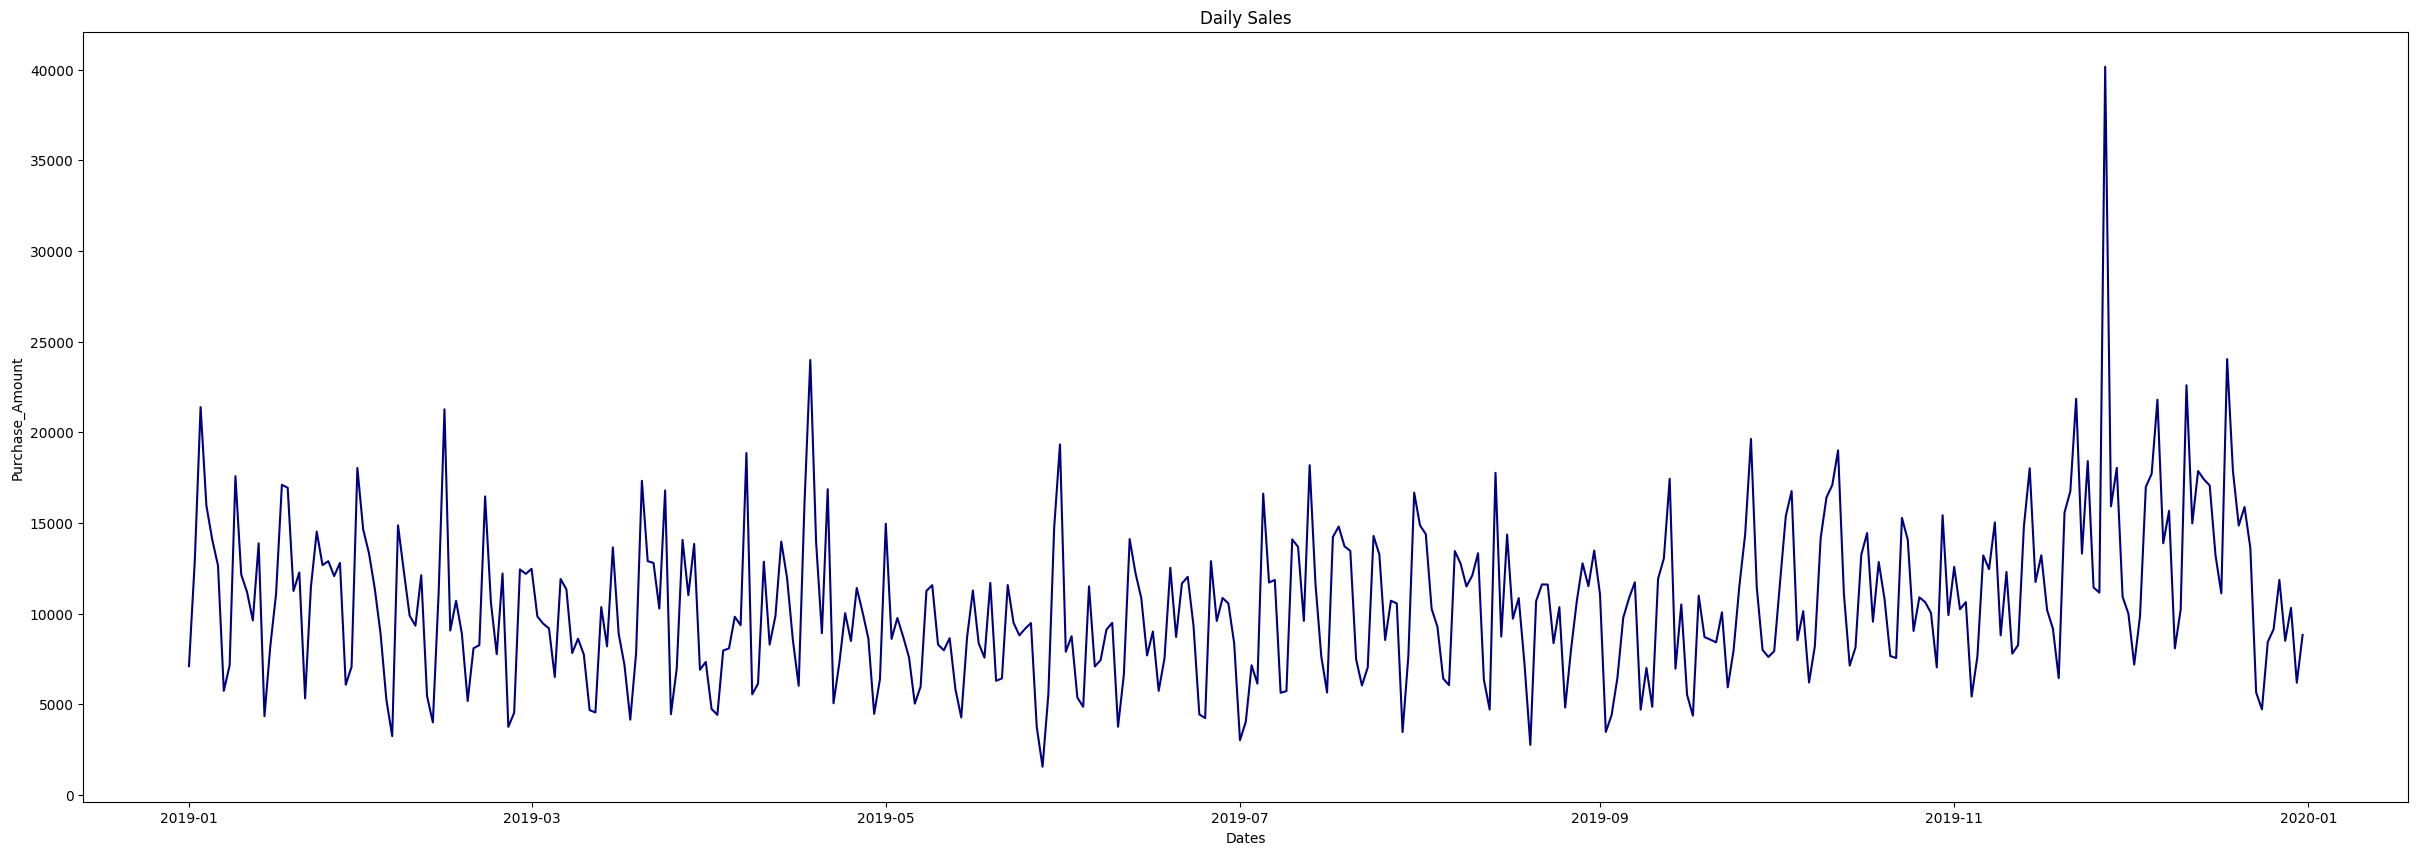

In [ ]:
plt.figure(figsize=(30, 10))

plt.plot(daily_sales["Transaction_Date"], daily_sales["Purchase_Amount"], color="navy")
plt.xlabel("Dates")
plt.ylabel("Purchase_Amount")
plt.title("Daily Sales")
plt.show()

In [ ]:
highest_date = daily_sales.loc[daily_sales["Purchase_Amount"].idxmax(), "Transaction_Date"]
print(highest_date)

2019-11-27 00:00:00


What happen in 27/11/2019?

In [ ]:
final_df[final_df["Transaction_Date"]=="2019-11-27"]

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Coupon_Status,Gender,Tenure_Months,Month,Coupon_Code,Discount_pct,Purchase_Amount,Discount_Amount,Gross_Revenue
46892,14502,44697,2019-11-27,GGOEAFKA087599,Android Large Removable Sticker Sheet,Accessories,1,2.39,Clicked,M,22,Nov,ACC20,0.2,2.39,0.0,2.39
46893,14502,44697,2019-11-27,GGOEGBRJ037299,Google Alpine Style Backpack,Bags,1,79.99,Clicked,M,22,Nov,AIO20,0.2,79.99,0.0,79.99
46894,14502,44697,2019-11-27,GGOEGBRJ037399,Google Rucksack,Bags,1,55.99,Clicked,M,22,Nov,AIO20,0.2,55.99,0.0,55.99
46895,14502,44697,2019-11-27,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.39,Clicked,M,22,Nov,OFF20,0.2,2.39,0.0,2.39
46896,14502,44697,2019-11-27,GGOEGHPB071610,Google Twill Cap,Apparel,1,8.79,Clicked,M,22,Nov,SALE20,0.2,8.79,0.0,8.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47199,17220,44956,2019-11-27,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,119.00,Clicked,F,19,Nov,ELEC20,0.2,119.00,0.0,119.00
47200,17220,44956,2019-11-27,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,1,119.00,Used,F,19,Nov,ELEC20,0.2,95.20,23.8,119.00
47201,17220,44957,2019-11-27,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,149.00,Not Used,F,19,Nov,ELEC20,0.2,149.00,0.0,149.00
47202,17220,44958,2019-11-27,GGOENEBD084799,Nest Learning Thermostat 3rd Gen-USA - Copper,Nest-USA,1,149.00,Used,F,19,Nov,ELEC20,0.2,119.20,29.8,149.00


In [ ]:
final_df[final_df["Transaction_Date"]=="2019-11-27"].groupby("CustomerID")["Purchase_Amount"].sum()

,Purchase_Amount
CustomerID,
12528,4068.460
12720,2151.966
12731,6616.094
12841,2028.700
13089,1491.838
13324,1218.400
13396,198.000
13615,99.000
13784,63.200


VVIP customerIDs:  

### Monthly total sales

Introduction: **Monthly total sales** is a key performance metric that measures **the total revenue generated from all transactions within a given month**. It helps businesses track sales trends over time, identify seasonal patterns, and evaluate the effectiveness of marketing or promotional activities.

In [ ]:
# Calculate total price by month
monthly_sales = final_df.groupby('Month')['Purchase_Amount'].sum().reset_index()

monthly_sales.sort_values(by="Purchase_Amount",ascending=False)

,Month,Purchase_Amount
2,Dec,405444.044
9,Nov,401410.242
4,Jan,370065.686
10,Oct,356252.599
1,Aug,320671.292
5,Jul,314237.760
7,Mar,298935.091
0,Apr,297997.020
11,Sep,277237.330
3,Feb,272600.866


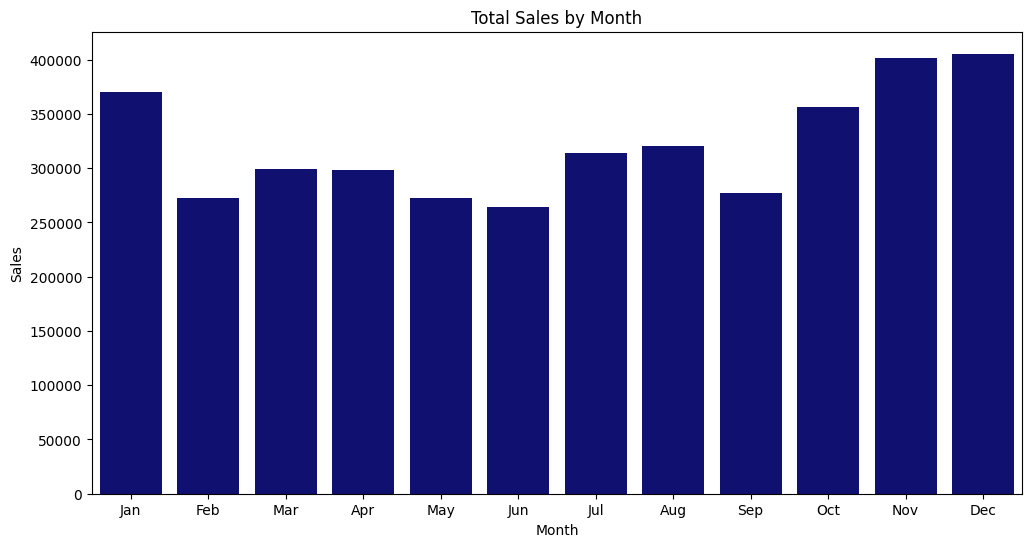

In [ ]:
# Define the order of months for plotting
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x="Month", y="Purchase_Amount", data=monthly_sales, order=month_order, color="navy")
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

📌 **Key takeaway:**
- November and December are months that have highest sales
- May and Jun are the least profitable months

### **Purchase Frequency**

**Purchase frequency** measures on average, how often each customer make transaction within specific period of time.

In [ ]:
number_of_transaction=final_df["Transaction_ID"].count()
print(f"Total number of transaction over 12 months: {number_of_transaction}")

Total number of transaction over 12 months: 51545


In [ ]:
purchase_frequency=number_of_transaction/number_of_customer
print(f"Purchase frequency: {purchase_frequency}")

NameError: name 'number_of_customer' is not defined

Low sales months (February, May, June):

In [ ]:
number_of_customer_in_Feb=final_df[final_df["Transaction_Date"].dt.month==2]["CustomerID"].nunique()
number_of_transaction_in_Feb=final_df[final_df["Transaction_Date"].dt.month==2]["Transaction_ID"].unique().size
purchase_frequency_in_Feb=round((number_of_transaction_in_Feb/number_of_customer_in_Feb),2)
print(f"Purchase frequency in February: {purchase_frequency_in_Feb}")

In [ ]:
number_of_customer_in_May=final_df[final_df["Transaction_Date"].dt.month==5]["CustomerID"].nunique()
number_of_transaction_in_May=final_df[final_df["Transaction_Date"].dt.month==5]["Transaction_ID"].unique().size
purchase_frequency_in_May=round((number_of_transaction_in_May/number_of_customer_in_May),2)
print(f"Purchase frequency in May: {purchase_frequency_in_May}")

In [ ]:
number_of_customer_in_Jun=final_df[final_df["Transaction_Date"].dt.month==6]["CustomerID"].nunique()
number_of_transaction_in_Jun=final_df[final_df["Transaction_Date"].dt.month==6]["Transaction_ID"].unique().size
purchase_frequency_in_Jun=round((number_of_transaction_in_Jun/number_of_customer_in_Jun),2)
print(f"Purchase frequency in June: {purchase_frequency_in_Jun}")

High sales months (Nov, Dec)

In [ ]:
number_of_customer_in_Nov=final_df[final_df["Transaction_Date"].dt.month==11]["CustomerID"].nunique()
number_of_transaction_in_Nov=final_df[final_df["Transaction_Date"].dt.month==11]["Transaction_ID"].unique().size
purchase_frequency_in_Nov=round((number_of_transaction_in_Nov/number_of_customer_in_Nov),2)
print(f"Purchase frequency in November: {purchase_frequency_in_Nov}")

In [ ]:
number_of_customer_in_Dec=final_df[final_df["Transaction_Date"].dt.month==12]["CustomerID"].nunique()
number_of_transaction_in_Dec=final_df[final_df["Transaction_Date"].dt.month==12]["Transaction_ID"].unique().size
purchase_frequency_in_Dec=round((number_of_transaction_in_Dec/number_of_customer_in_Dec),2)
print(f"Purchase frequency in December: {purchase_frequency_in_Dec}")

### **Average Value per transaction**

**Average value per transaction** measures the average amount spent by customers in a single purchase.

In [ ]:
# Total average value
total_sales = final_df["Purchase_Amount"].sum()
number_of_transaction = final_df["Transaction_ID"].unique().size
avg_value_per_transaction = total_sales / number_of_transaction
avg_value_per_transaction = avg_value_per_transaction.round(3)
print(f"Avg value per transaction: {avg_value_per_transaction}")

*Low sales month (February, May, June)*

In [ ]:
total_sales_in_feb = final_df[final_df["Transaction_Date"].dt.month == 2]["Purchase_Amount"].sum()

# Average value per transaction
avg_value_per_transaction_in_Feb = total_sales_in_Feb / number_of_transaction_in_Feb
avg_value_per_transaction_in_Feb=avg_value_per_transaction_in_Feb.round(3)
print(f"Avg value in February: {avg_value_per_transaction_in_Feb}")

In [ ]:
total_sales_in_May = final_df[final_df["Transaction_Date"].dt.month == 5]["Purchase_Amount"].sum()

# Average value per transaction
avg_value_per_transaction_in_May = total_sales_in_May / number_of_transaction_in_May
avg_value_per_transaction_in_May = avg_value_per_transaction_in_May.round(3)
print(f"Avg value in May: {avg_value_per_transaction_in_May}")

In [ ]:
total_sales_in_Jun = final_df[final_df["Transaction_Date"].dt.month == 6]["Purchase_Amount"].sum()

# Average value per transaction
avg_value_per_transaction_in_Jun = total_sales_in_Jun / number_of_transaction_in_Jun
avg_value_per_transaction_in_Jun = avg_value_per_transaction_in_Jun.round(3)
print(f"Avg value in June: {avg_value_per_transaction_in_Jun}")

*High sales month (Nov, Dec)*

In [ ]:
total_sales_in_Nov = final_df[final_df["Transaction_Date"].dt.month == 11]["Purchase_Amount"].sum()

# Average value per transaction
avg_value_per_transaction_in_Nov = total_sales_in_Nov / number_of_transaction_in_Nov
avg_value_per_transaction_in_Nov = avg_value_per_transaction_in_Nov.round(3)
print(f"Avg value in November: {avg_value_per_transaction_in_Nov}")

In [ ]:
total_sales_in_Dec = final_df[final_df["Transaction_Date"].dt.month == 12]["Purchase_Amount"].sum()

# Average value per transaction
avg_value_per_transaction_in_Dec = total_sales_in_Dec / number_of_transaction_in_Dec
avg_value_per_transaction_in_Dec = avg_value_per_transaction_in_Dec.round(3)
print(f"Avg value in December: {avg_value_per_transaction_in_Dec}")

📌 **Summary of the findings**

In [ ]:
summary=pd.DataFrame(
    {'Month': ['Feb','May','Jun','Nov','Dec'],
     'Total sale': [total_sales_in_Feb,total_sales_in_May,total_sales_in_Jun,total_sales_in_Nov, total_sales_in_Dec],
     'Number of transaction' : [number_of_transaction_in_Feb,number_of_transaction_in_May,number_of_transaction_in_Jun,number_of_transaction_in_Nov,number_of_transaction_in_Dec],
     'Avg_value_per_transaction': [avg_value_per_transaction_in_Feb,avg_value_per_transaction_in_May,avg_value_per_transaction_in_Jun,avg_value_per_transaction_in_Nov,avg_value_per_transaction_in_Dec],
     'Number of unique customers': [number_of_customer_in_Feb,number_of_customer_in_May,number_of_customer_in_Jun,number_of_customer_in_Nov,number_of_customer_in_Dec],
     'Purchase_Frequency': [purchase_frequency_in_Feb,purchase_frequency_in_May,purchase_frequency_in_Jun,purchase_frequency_in_Nov,purchase_frequency_in_Dec]
    }
)

In [ ]:
! pip install tabulate

from tabulate import tabulate

col_names = ["Month", "Total sale ($)", "No. of transaction", "Avg basket value ($)", "No. of unique customers","Purchase_Frequency"]

print(tabulate(summary, headers=col_names, tablefmt="pipe"))

📍 **Key Insights:**

The revenue of the company fluctuated depending on the seasonal factors
- Peak revenue months (Nov, Dec): Driven by holidays and demand for high-value products.
> **Strategy:** Launch targeted holiday campaigns, offer premium bundles, and ensure strong inventory planning.
- Feb, May and June had low revenue but the purchase frequency is relatively high: Likely due to repeat purchases of low-priced items bought by a small to high customer number.
> **Strategy:** Use volume discounts, product bundling, and cross-selling to boost average transaction value.

## **Focused Analysis**

### Product tier classification

In [ ]:
product_tier = final_df.groupby('Product_Category')['Avg_Price'].mean().reset_index().round(2)
product_tier.sort_values(by='Avg_Price', ascending=False)

I clasify 3 product tiers:
- **High tier:** Gift Cards, Nest-USA, Nest, Nest-Canada (avg_price >= 100)
- **Mid tier:** Bags, Apparel, Android, Headgear (avg_price >= 15)
- **Low tier:** others (avg_price < 15)

In [ ]:
low_threshold = 15
high_threshold = 100

# Classification function
def classify_price(price):
    if price < low_threshold:
        return 'Low'
    elif price < high_threshold:
        return 'Mid'
    else:
        return 'High'

# Apply classification
product_tier['Tier'] = product_tier['Avg_Price'].apply(classify_price)

product_tier.sort_values(by='Avg_Price', ascending=False)

In [ ]:
product_tier=product_tier.drop(columns="Avg_Price")

In [ ]:
merged_data_2 = pd.merge(final_df, product_tier, on='Product_Category', how='inner')
merged_data_2

Check the new data:

In [ ]:
merged_data_2.info()

In [ ]:
merged_data_2["Tier"]=merged_data_2["Tier"].astype("category")

In [ ]:
sales_by_product_tier=merged_data_2.groupby("Tier")["Purchase_Amount"].mean().reset_index().round(2)
sales_by_product_tier

In [ ]:
qty_by_product_tier=merged_data_2.groupby("Tier")["Quantity"].mean().reset_index().round(2)
qty_by_product_tier

**Key takeaway:**
- Premium product is key product bring high revenue.
- Mid-level product has the highest quantity purchased.
--> Focus on premium strategies, exclusive program for high value product
--> Focus on discount and bulk purchase for mid-level product to increase quantity

In [ ]:
# High tier monthly sales
monthly_sales_by_high_tier=merged_data_2[merged_data_2["Tier"]=="High"].groupby(["Month"])["Purchase_Amount"].sum().reset_index().round(1)

#Mid tier monthly sales
monthly_sales_by_mid_tier=merged_data_2[merged_data_2["Tier"]=="Mid"].groupby(["Month"])["Purchase_Amount"].sum().reset_index().round(1)

#Mid tier montly sales
monthly_sales_by_low_tier=merged_data_2[merged_data_2["Tier"]=="Low"].groupby(["Month"])["Purchase_Amount"].sum().reset_index().round(1)

In [ ]:
summary=pd.DataFrame(
    {'Month': monthly_sales["Month"],
     'High': monthly_sales_by_high_tier["Purchase_Amount"],
     'Mid': monthly_sales_by_mid_tier["Purchase_Amount"],
     'Low': monthly_sales_by_low_tier["Purchase_Amount"]
    }
)

In [ ]:
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Convert to categorical with the specified order
summary["Month"] = pd.Categorical(summary["Month"], categories=month_order, ordered=True)

# Sort by Month in that order
summary = summary.sort_values("Month").reset_index(drop=True)

summary

In [ ]:
plt.figure(figsize=(20, 10))

width = 0.3
values=np.arange(len(summary["Month"]))

plt.bar(values - width,summary["High"],width, label="High", color="gold")
plt.bar(values,summary["Mid"], width, label="Mid", color="navy")
plt.bar(values + width,summary["Low"], width, label="Low", color="orange")
plt.title("Monthly Sales by Tier")
plt.xlabel("Month")
plt.ylabel("Purchase_Amount")
plt.xticks(values, summary["Month"])
plt.legend()
plt.show()


📌**Key takeaway:**
- High-tier sales are heavily skewed toward year-end and early-year months.
- Mid-tier sales fluctuate, hitting the lowest point at year-end.
- Low-tier sales remain consistent throughout the year but make up the smallest share of total sales.
- In April, both mid- and low-tier sales reach their annual peak, while high-tier sales are low; total sales remain stable.

> **Problem:** Over-reliance on high-tier products. Sales could grow significantly by boosting all tiers.

> **Job-to-be-Done:** Achieve balanced growth across tiers by identifying key products to prioritize and low-impact products to phase out.

### Product category's potential evaluation

Given the scarcity of resources, it is essential for the company to identify and prioritize product categories that generate the highest profitability.

Conversely, product categories with low productivity and poor efficiency should be evaluated for possible reduction or elimination to optimize costs and improve overall operational efficiency.

In [ ]:
top_purchase_by_product_cat = final_df.groupby('Product_Category')['Transaction_ID'].count().reset_index()
top_purchase_by_product_cat.sort_values(by="Transaction_ID",ascending=False)

📌**Key takeaway:**
- The highest product categories volumn: Apparel, Nest-USA, Office
- The least product categories volumn: Gift Cards, Housewares, Android

In [ ]:
total_sales_by_product_cat = final_df.groupby('Product_Category')['Purchase_Amount'].sum().reset_index()
total_sales_by_product_cat["Percentage"]=(total_sales_by_product_cat["Purchase_Amount"]/total_sales_by_product_cat["Purchase_Amount"].sum()*100).round(2)
total_sales_by_product_cat.sort_values(by="Percentage",ascending=False)

📌**Key takeaway:**
- The top profitable product categories: Nest-USA, Apparel, Nest
- The least profitable product categories: Waze, Housewares, Android

📍 **Outcome:**
- We should invest more and focus on top profitable products including Nest-USA, Apparel, Nest, and Office as our key products.
- The product that have the least revenue and the lowest productivity such as Housewares and Android should be considered to sacrifice and not spend too much money on that.

Create dataframe of top 2 key categories and low profitable ones to analyze their performance.


In [ ]:
nest_usa_df=final_df[final_df["Product_Category"]=="Nest-USA"]
apparel_df=final_df[final_df["Product_Category"]=="Apparel"]

In [ ]:
housewares_df=final_df[final_df["Product_Category"]=="Housewares"]
android_df=final_df[final_df["Product_Category"]=="Android"]

#### High profitable category: Nest-USA

In [ ]:
nest_usa_monthly_sales = nest_usa_df.groupby("Month")["Purchase_Amount"].sum().reset_index().round(2)
nest_usa_monthly_sales

In [ ]:
# Plot the bar chart
plt.figure(figsize=(15, 8))
bar = plt.bar(nest_usa_monthly_sales["Month"], nest_usa_monthly_sales["Purchase_Amount"],color="palevioletred")
for bar in bar:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.1f}', ha='center', va='bottom', fontsize=12)
plt.title('Nest USA Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Purchase_Amount')
plt.show()

In [ ]:
nest_usa_sales_by_product = nest_usa_df.groupby("Product_SKU")["Purchase_Amount"].sum().reset_index()
nest_usa_sales_by_product = nest_usa_sales_by_product.sort_values(by='Purchase_Amount',ascending=False)
nest_usa_sales_by_product

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(nest_usa_sales_by_product['Purchase_Amount'],
        labels=nest_usa_sales_by_product["Product_SKU"],
        autopct='%1.1f%%',
       )
plt.title("Product Sales Distribution")
plt.show()

In [ ]:
nest_usa_df[nest_usa_df["Product_SKU"].isin(["GGOENEBJ079499","GGOENEBQ078999","GGOENEBB078899"])]["Product_Description"].unique()

📍 **Summary:**

#### High profitable category: Apparel

In [ ]:
apparel_monthly_sales = apparel_df.groupby("Month")["Purchase_Amount"].sum().reset_index()
apparel_monthly_sales

In [ ]:
plt.figure(figsize=(15, 8))
bar = plt.bar(apparel_monthly_sales["Month"], apparel_monthly_sales["Purchase_Amount"],color="gold")
for bar in bar:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.1f}', ha='center', va='bottom', fontsize=12)
plt.title('Apparel Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Purchase_Amount')
plt.legend()
plt.show()

Top 3 best-seller products:

In [ ]:
apparel_sales_by_product = apparel_df.groupby("Product_SKU")["Purchase_Amount"].sum().reset_index()
apparel_sales_by_product = apparel_sales_by_product.sort_values(by='Purchase_Amount',ascending=False)
apparel_sales_by_product

In [ ]:
apparel_df[apparel_df["Product_SKU"].isin(["GGOEGHPB071610","GGOEGAFB035815","GGOEYHPB072210"])]["Product_Description"].unique()

In [ ]:
apparel_df["Quantity"].max()

In [ ]:
apparel_montly_qty = apparel_df.groupby("Month")["Quantity"].mean().reset_index().round(2)
apparel_montly_qty

📍 **Summary:**

- Bán nhiều vào các tháng (kh phải sale cao)

#### Low profitable category: Housewares

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(housewares_df["Transaction_Date"],housewares_df["Purchase_Amount"],color="navy")
plt.xlabel("Dates")
plt.ylabel("Purchase_Amount")
plt.title("Housewares Daily Sales")

In [ ]:
housewares_monthly_sales = housewares_df.groupby('Month')['Purchase_Amount'].sum().reset_index()
housewares_monthly_sales

In [ ]:
housewares_monthly_quantity = housewares_df.groupby("Month")["Quantity"].mean().reset_index().round(2)
housewares_monthly_quantity

In [ ]:
housewares_df["Avg_Price"].mean()

**Key takeaway:** Housewares product category had low sales (there was even no sales in year-end months) but the quantity sold is much higher than the average quantity sold of other top sell products.
> Suggestions: create limited editions, product innovations and sell with higher values.

#### Low profitable category: Android

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(android_df["Transaction_Date"],android_df["Purchase_Amount"],color="orange")
plt.xlabel("Dates")
plt.ylabel("Purchase_Amount")
plt.title("Android Sales")

In [ ]:
android_monthly_sales=android_df.groupby("Month")["Purchase_Amount"].sum().reset_index()
android_monthly_sales = android_monthly_sales.sort_values('Month')
android_monthly_sales

In [ ]:
android_monthly_quantity = android_df.groupby("Month")["Quantity"].mean().reset_index().round(2)
android_monthly_quantity

In [ ]:
plt.figure(figsize=(20, 10))
plt.bar(housewares_monthly_sales["Month"], housewares_monthly_sales["Purchase_Amount"],color="navy", label="Housewares")
plt.bar(android_monthly_sales["Month"], android_monthly_sales["Purchase_Amount"],color="orange", label="Android")
plt.title('Housewares vs Android Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()

📍 **Key takeaway:** Android product category had lowest performance both revenue and volumn.
> Suggestions: stop purchase this product category. Save resources to other products.

## **Marketing Spend**

In [ ]:
mkt_spend_df['Month'] = mkt_spend_df['Date'].dt.strftime('%b')
mkt_spend_df

In [ ]:
mkt_spend_df["Total_mkt_spend"]=mkt_spend_df["Offline_Spend"] + mkt_spend_df["Online_Spend"]

In [ ]:
monthly_mkt_spend=mkt_spend_df.groupby("Month")[["Offline_Spend","Online_Spend"]].sum().reset_index()
monthly_mkt_spend

In [ ]:
monthly_mkt_spend["Total_mkt_spend"]=monthly_mkt_spend["Offline_Spend"] + monthly_mkt_spend["Online_Spend"]

In [ ]:
monthly_summary=pd.DataFrame(
    {'Month': monthly_sales['Month'],
     'Total_Sale': monthly_sales['Purchase_Amount'],
     'Mkt_spend': monthly_mkt_spend["Total_mkt_spend"].values,
     })
monthly_summary

📌 **Key Takeaway:**
- Purchase_Amount has a strong positive correlation with Offline_Spend (0.77) and Online_Spend (0.86). The correlation is slightly stronger with online spending.
> The amount spent both offline and online increases, the total purchase amount also tends to increase.
- Discount_pct has a weak negative correlation with Purchase_Amount (-0.22).
> The purchase amount tend to be lower when a higher discount percentage is applied. However, the relationship is not very strong.




## Correlation Matrix

In [ ]:
apparel_df

In [ ]:
numeric_cols = apparel_df.select_dtypes(include=[np.number]).columns.tolist()
num_df = apparel_df[numeric_cols]

In [ ]:
correlation_matrix=num_df.corr()
correlation_matrix

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Apparel')
plt.show()

# **Model Building**

The research of objective is to investigate the influence of promotion to sales in the most profitable product category.

## Data Preparation [final]

## Data Preparation : Linear Regression (Mkt spend vs sales)

In [ ]:
daily_sales=final_df.groupby("Transaction_Date")["Purchase_Amount"].sum().reset_index()
daily_sales

In [ ]:
summary=pd.DataFrame(
    {'Date': mkt_spend_df['Date'],
     'Total sale': daily_sales['Purchase_Amount'],
     'Total_mkt_spend': mkt_spend_df["Total_mkt_spend"],
     })
summary

## *Simple Linear Regression: Marketing Spend vs Sales*

H0: There is no relationship between marketing spend and sales.
H1: There is relationship between marketing spend and sales.

In [ ]:
summary.describe()

In [ ]:
X = summary['Total_mkt_spend']
y = summary['Total sale']

# Add constant for intercept
X = sm.add_constant(X)

# Fit regression model
model = sm.OLS(y, X).fit()

# Show results
print(model.summary())

## Data Preparation: Linear Regression: Discount vs Sales (mid product cat)

In [ ]:
mid_tier_data = merged_data_2[merged_data_2['Tier'] == 'Mid']
mid_tier_data.describe()

In [ ]:
Q1 = mid_tier_data["Avg_Price"].quantile(0.25)
Q3 = mid_tier_data["Avg_Price"].quantile(0.75)

IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q3 - 1.5 * IQR

In [ ]:
lower_bound

In [ ]:
upper_bound

In [ ]:
con1 = (mid_tier_data["Avg_Price"] <= upper_bound) & (mid_tier_data["Avg_Price"] >= lower_bound)

In [ ]:
Q1 = mid_tier_data["Quantity"].quantile(0.25)
Q3 = mid_tier_data["Quantity"].quantile(0.75)

IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q3 - 1.5 * IQR

In [ ]:
lower_bound

In [ ]:
upper_bound

In [ ]:
Q=mid_tier_data["Quantity"].quantile(0.95)
Q

In [ ]:
con2=mid_tier_data["Quantity"] <= upper_bound

In [ ]:
mid_tier_data_cleaned=mid_tier_data[(con1 & con2)]

In [ ]:
features=mid_tier_data[["Quantity","Avg_Price","Tenure_Months","Discount_pct","Purchase_Amount","Discount_Amount","Gross_Revenue"]]
correlation_matrix=features.corr()
correlation_matrix

In [ ]:
mid_tier_data = mid_tier_data[(mid_tier_data["Quantity"] <= 10)]
mid_tier_data.info()

In [ ]:
one_hot_encoded_data=pd.get_dummies(mid_tier_data,columns=["Coupon_Status"])
one_hot_encoded_data

In [ ]:
one_hot_encoded_data.info()

#### Linear Regression Mid tier discount vs sales

In [ ]:
X = one_hot_encoded_data[['Coupon_Status_Clicked','Coupon_Status_Not Used','Coupon_Status_Used','Discount_pct',"Tenure_Months"]]
y = one_hot_encoded_data['Gross_Revenue']

# Add constant for intercept
X = sm.add_constant(X)

# Fit regression model
model = sm.OLS(y, X.astype(float)).fit()

# Show results
print(model.summary())

In [ ]:
X = high_tier_data['Avg_Price']
y = high_tier_data['Quantity']

# Add constant for intercept
X = sm.add_constant(X)

# Fit regression model
model = sm.OLS(y, X).fit()

# Show results
print(model.summary())

In [ ]:
numeric_cols = high_tier_data.select_dtypes(include=[np.number]).columns.tolist()
num_df = high_tier_data[numeric_cols]

In [ ]:
correlation_matrix = num_df.corr()
correlation_matrix

## Linear Regression: Discount vs Sales (full no filter)

In [ ]:
final_df_filtered=final_df[(final_df["Coupon_Status"]=="Used")]
final_df_filtered

In [ ]:
final_df_filtered.describe()

In [ ]:
Q1 = final_df_filtered["Quantity"].quantile(0.25)

Q3 = final_df_filtered["Quantity"].quantile(0.75)

IQR= Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q3 - 1.5 * IQR

In [ ]:
upper_bound

In [ ]:
con1=final_df_filtered["Quantity"] <= upper_bound

In [ ]:
Q1 = final_df_filtered["Avg_Price"].quantile(0.25)

Q3 = final_df_filtered["Avg_Price"].quantile(0.75)

IQR= Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q3 - 1.5 * IQR

In [ ]:
upper_bound

In [ ]:
con2=final_df_filtered["Avg_Price"] <= upper_bound

In [ ]:
Q1 = final_df_filtered["Tenure_Months"].quantile(0.25)

Q3 = final_df_filtered["Tenure_Months"].quantile(0.75)

IQR= Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q3 - 1.5 * IQR

In [ ]:
upper_bound

In [ ]:
Q1 = final_df_filtered["Purchase_Amount"].quantile(0.25)

Q3 = final_df_filtered["Purchase_Amount"].quantile(0.75)

IQR= Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q3 - 1.5 * IQR

In [ ]:
upper_bound

In [ ]:
con3=final_df_filtered["Purchase_Amount"] <= upper_bound

In [ ]:
Q1 = final_df_filtered["Discount_Amount"].quantile(0.25)

Q3 = final_df_filtered["Discount_Amount"].quantile(0.75)

IQR= Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q3 - 1.5 * IQR

In [ ]:
upper_bound

In [ ]:
con4=final_df_filtered["Discount_Amount"] <= upper_bound

In [ ]:
final_df_filtered_cleaned = final_df_filtered[(((con1 & con2) & con3) & con4)]

In [ ]:
final_df_filtered_cleaned

In [ ]:
final_df_filtered_cleaned["Gross_Revenue"] = final_df_filtered_cleaned["Avg_Price"] * final_df_filtered_cleaned["Quantity"]

In [ ]:
x = final_df_filtered_cleaned["Discount_pct"]
y = final_df_filtered_cleaned["Gross_Revenue"]

# Add constant for intercept
X = sm.add_constant(x)
# Fit regression model
model = sm.OLS(y, X).fit()

# Show results
print(model.summary())

In [ ]:
x = final_df_filtered_cleaned["Discount_pct"]
y = final_df_filtered_cleaned["Quantity"]

# Add constant for intercept
X = sm.add_constant(x)
# Fit regression model
model = sm.OLS(y, X).fit()

# Show results
print(model.summary())

## Linear Regression: Gender

### Data preparation

In [ ]:
reference_date = final_df['Transaction_Date'].max()

# Group by 'CustomerID' and apply aggregation functions
customer_df = final_df.groupby('CustomerID').agg(
    # Recency: Calculate the difference in days between the reference date and the last purchase date
    Days_since_last_purchase=('Transaction_Date', lambda x: (reference_date - x.max()).days),

    # Monetary Value: Calculate the mean of the purchase amount
    Avg_monetary_value=('Purchase_Amount', 'mean'),

    # Tenure: Get the maximum tenure for each customer (assuming it's cumulative)
    Tenure=('Tenure_Months', 'max'),

    # Discount Sensitivity: Calculate the average discount percentage used by the customer
    Discount_Sensitivity=('Discount_pct', 'mean'),

    # Frequency: Count the total number of transactions for each customer
    Frequency=('CustomerID', 'size'),

    Quantity=('Quantity', 'sum'),

    Gender=('Gender', lambda x: x.mode()[0] if not x.mode().empty else None)
).reset_index()

# Rename the columns for clarity
customer_df.columns = ['CustomerID', 'Days_since_last_purchase', 'Avg_monetary_value', 'Tenure', 'Discount_Sensitivity', 'Frequency', 'Quantity', "Gender"]

# Display the resulting DataFrame
customer_df

In [ ]:
customer_df.describe()

In [ ]:
Q1 = customer_df['Days_since_last_purchase'].quantile(0.25)
Q3 = customer_df['Days_since_last_purchase'].quantile(0.75)

# IQR calculation
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q3 - 1.5 * IQR

In [ ]:
upper_bound

In [ ]:
Q1 = customer_df['Avg_monetary_value'].quantile(0.25)
Q3 = customer_df['Avg_monetary_value'].quantile(0.75)

# IQR calculation
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q3 - 1.5 * IQR

In [ ]:
upper_bound

In [ ]:
con1 = customer_df["Avg_monetary_value"] <= upper_bound

In [ ]:
Q1 = customer_df['Frequency'].quantile(0.25)
Q3 = customer_df['Frequency'].quantile(0.75)

# IQR calculation
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q3 - 1.5 * IQR

In [ ]:
upper_bound

In [ ]:
con2=customer_df["Frequency"] <= upper_bound

In [ ]:
Q1 = customer_df['Quantity'].quantile(0.25)
Q3 = customer_df['Quantity'].quantile(0.75)

# IQR calculation
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q3 - 1.5 * IQR

In [ ]:
upper_bound

In [ ]:
con3=customer_df["Quantity"] <= upper_bound

In [ ]:
customer_df_cleaned=customer_df[((con1 & con2) & con3)]

In [ ]:
customer_df_cleaned.describe()

In [ ]:
customer_df_cleaned

### Correlation Matrix

In [ ]:
features=customer_df_cleaned[["Days_since_last_purchase","Avg_monetary_value","Tenure","Discount_Sensitivity","Frequency","Quantity"]]
correlation_matrix=features.corr()
correlation_matrix

In [ ]:
one_hot_encoded_data=pd.get_dummies(customer_df_cleaned,columns=["Gender"])
one_hot_encoded_data.sample()

In [ ]:
x=one_hot_encoded_data[["Tenure", "Days_since_last_purchase", "Gender_F", "Gender_M"]]
y=one_hot_encoded_data["Discount_Sensitivity"]

X=sm.add_constant(x)
model=sm.OLS(y,X.astype(float)).fit()
print(model.summary())

## Linear Regression Apparel product

In [ ]:
apparel_avg_df = apparel_df.groupby("Avg_Price")["Transaction_ID"].count()
apparel_avg_df.sort_values(ascending=False)

In [ ]:
apparel_filtered_df=apparel_df[(apparel_df["Avg_Price"]>=13) & (apparel_df["Avg_Price"]<=30) & (apparel_df["Quantity"]==1)]

In [ ]:
apparel_filtered_df.describe()

In [ ]:
features=apparel_filtered_df[["Avg_Price","Tenure_Months","Discount_pct","Purchase_Amount","Discount_Amount","Gross_Revenue"]]
correlation_matrix=features.corr()
correlation_matrix

In [ ]:
x=apparel_filtered_df[["Discount_pct"]]
y=apparel_filtered_df["Gross_Revenue"]

X=sm.add_constant(x)
model=sm.OLS(y,X.astype(float)).fit()
print(model.summary())